# **Project Summary**


This Exploratory Data Analysis (EDA) investigates Walmart’s sales performance across 45 stores in the U.S., spanning from February 2010 to October 2012. Using Python, Pandas, Seaborn, and Matplotlib, the project unearths patterns in weekly sales, holiday impacts, macroeconomic indicators, and seasonal trends to better understand what drives store performance.

## **Problem Statement**

Walmart aims to optimize store performance and marketing strategies by analyzing historical sales data. The core objective is to:
- Identify top and underperforming stores.
- Understand the influence of holidays, temperature, and economic indicators.
- Recognize seasonal sales trends. This insight can help with stock planning, targeted promotions, and operational adjustments.


### Know our Data

### Importing relevant libraries

In [1]:
#Important Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [3]:
df= pd.read_csv("Walmart.csv")        #loading the dataset
df.head(5)                            #top 5 rows of table


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Columns in Dataset

In [5]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

# **Description of Dataset**

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 - Holiday week  0-Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI - Prevailing consumer price index

Unemployment - Prevailing unemployment rate

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Dataset information

In [9]:
#returns the information about our dataset like the number of columns, column labels, column data types, memory usage,
# range index, and the number of cells in each column (non-null values),etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


Columns and Rows in Dataset

In [13]:
##return the count of column and rows in dataset
df.shape      

(6435, 8)

Null values in Dataset

In [15]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
# Count of unique values in each column
unique_counts= df.nunique()
print(unique_counts)

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64


# **Data Manipulation & Preprocessing**

- Converted Date to datetime format.

- Mapped Holiday_Flag into readable strings: 'Holiday Week' / 'Non-Holiday Week'.

- Standardized numerical precision using .round().

- Fixed the Datatype of numerical columns


In [21]:
# Data Manipulation & Preprocessing

df["Date"]= pd.to_datetime(df["Date"],dayfirst= True , errors= "coerce") # for consistent date format

df["Holiday_Flag"]= df["Holiday_Flag"].replace({1:"Holiday Week" , 0:"Non-Holiday Week"})  #replacing 0 as non-holiday week and 1 as holiday week

#establishing consistent datatype

In [23]:
#establishing consistent datatype

df["Weekly_Sales"]= df["Weekly_Sales"].astype(float).round(2)
df["Temperature"]= df["Temperature"].astype(float).round(2)
df["Fuel_Price	"]= df["Fuel_Price"].astype(float).round(2)
df["CPI"]= df["CPI"].astype(float).round(2)
df["Unemployment"]= df["Unemployment"].astype(float).round(2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Fuel_Price	   6435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 452.6+ KB


In [74]:
###Distribution of weekly sales

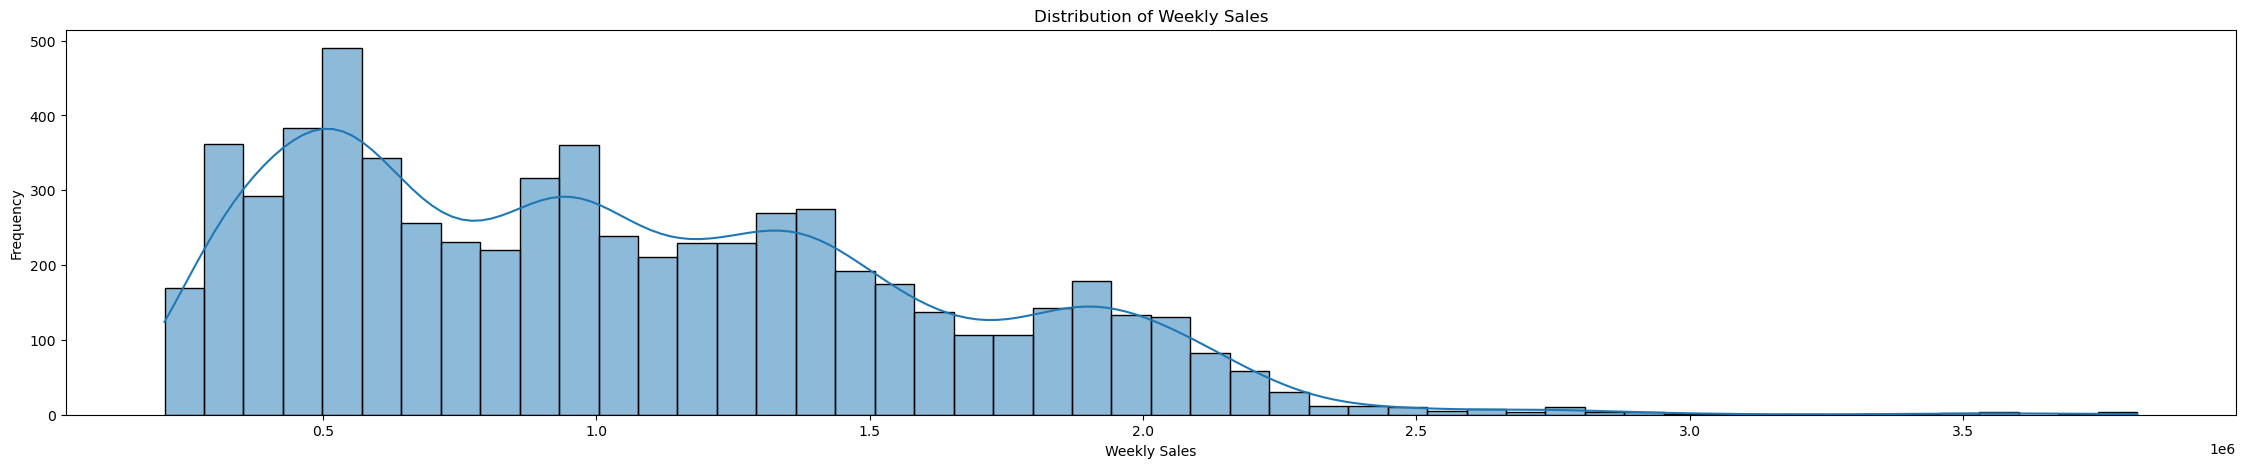

In [59]:
plt.figure(figsize=(28,5))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


- The distribution is right-skewed; a few stores generate significantly higher sales.
- Most weekly sales cluster below 1.5M, but some exceed 3M, suggesting outliers or exceptionally high-performing stores.

## Lets assess which holiday truly drives revenue and which ones are overestimated.


Holiday Events<br />
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> 
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> 
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> x
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [68]:
holidays = {
    'Super Bowl': ['2010-02-12', '2011-02-11', '2012-02-10'],
    'Labour Day': ['2010-09-10', '2011-09-09', '2012-09-07'],
    'Thanksgiving': ['2010-11-26', '2011-11-25', '2012-11-23'],
    'Christmas': ['2010-12-31', '2011-12-30', '2012-12-28']
}

In [74]:
df['Holiday_Name'] = df['Date'].astype(str).map({d: h for h, ds in holidays.items() for d in ds})
print(df[df['Holiday_Name'].notnull()].groupby('Holiday_Name')['Weekly_Sales'].mean())

Holiday_Name
Christmas       9.608331e+05
Labour Day      1.042427e+06
Super Bowl      1.079128e+06
Thanksgiving    1.471273e+06
Name: Weekly_Sales, dtype: float64


In [78]:
# Setting display format for floats
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Groupby and rename
average_sales = df.groupby('Store')['Weekly_Sales'].mean() \
                  .sort_values(ascending=False) \
                  .rename("Average_Weekly_Sales")

print(average_sales)

Store
20   2107676.87
4    2094712.96
14   2020978.40
13   2003620.31
2    1925751.34
10   1899424.57
27   1775216.20
6    1564728.19
1    1555264.40
39   1450668.13
19   1444999.04
31   1395901.44
23   1389864.46
24   1356755.39
11   1356383.12
28   1323522.24
41   1268125.42
32   1166568.15
18   1084718.42
22   1028501.04
12   1009001.61
26   1002911.84
34    966781.56
40    964128.04
35    919724.98
8     908749.52
17    893581.39
45    785981.41
21    756069.08
25    706721.53
43    633324.72
15    623312.47
7     570617.31
42    556403.86
9     543980.55
29    539451.43
16    519247.73
37    518900.28
30    438579.62
3     402704.44
38    385731.65
36    373511.99
5     318011.81
44    302748.87
33    259861.69
Name: Average_Weekly_Sales, dtype: float64


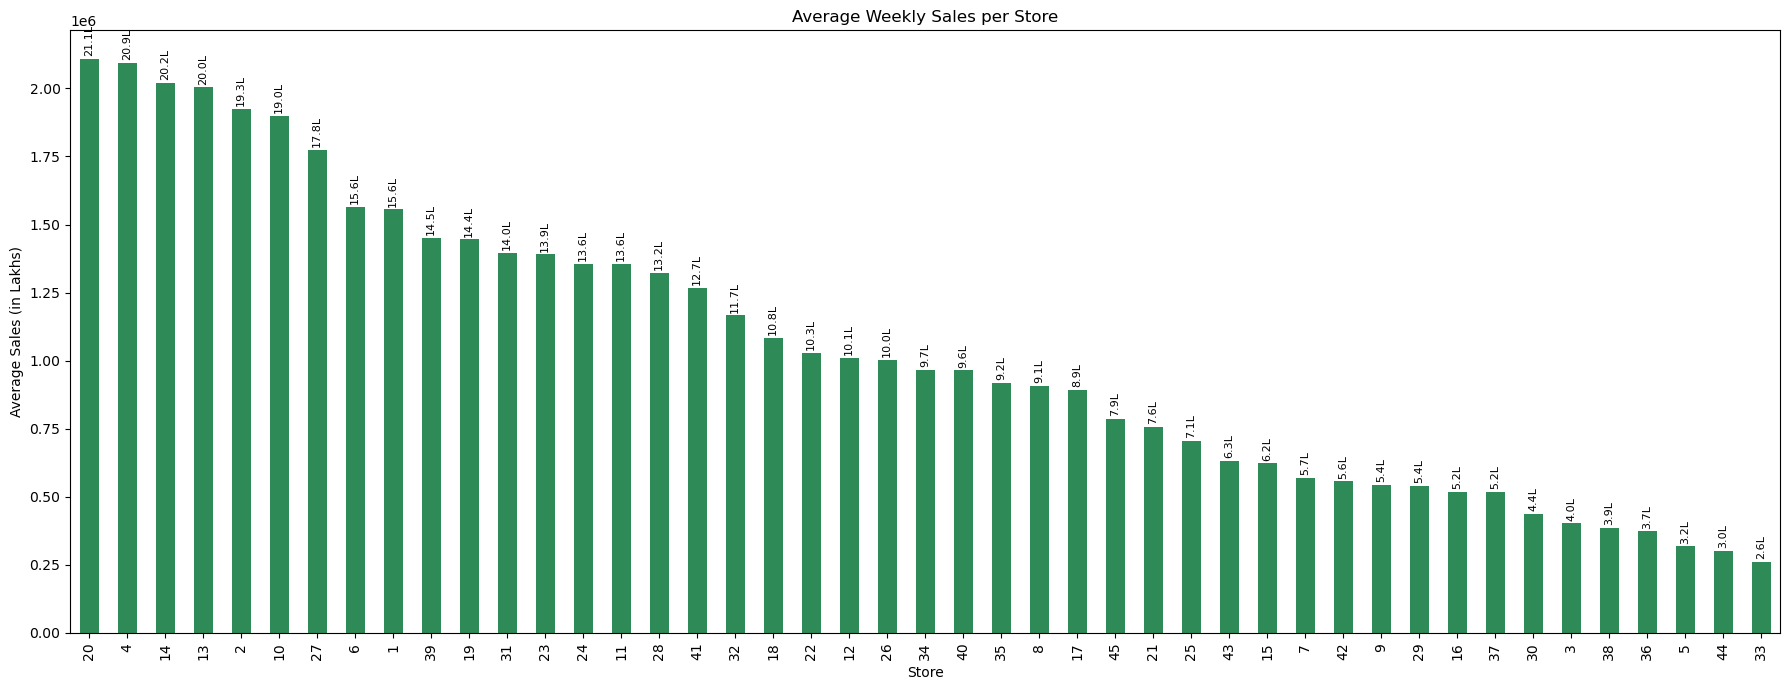

In [86]:
plt.figure(figsize=(18,7))
bars = average_sales.plot(kind='bar', color='seagreen')

# Annotating with Lakhs
for i, v in enumerate(average_sales):
    plt.text(i, v + 10000, f'{v/1e5:.1f}L', ha='center', va='bottom', fontsize=8, rotation=90)

plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Sales (in Lakhs)")
plt.tight_layout()
plt.show()


- Store 20 is the top performer (~21.1L), followed by Store 4 and Store 14.
- There’s a steep drop toward lower-ranked stores, identifying optimization or resource reallocation opportunities for underperformers.


Enter a store number (1 to 45):  25


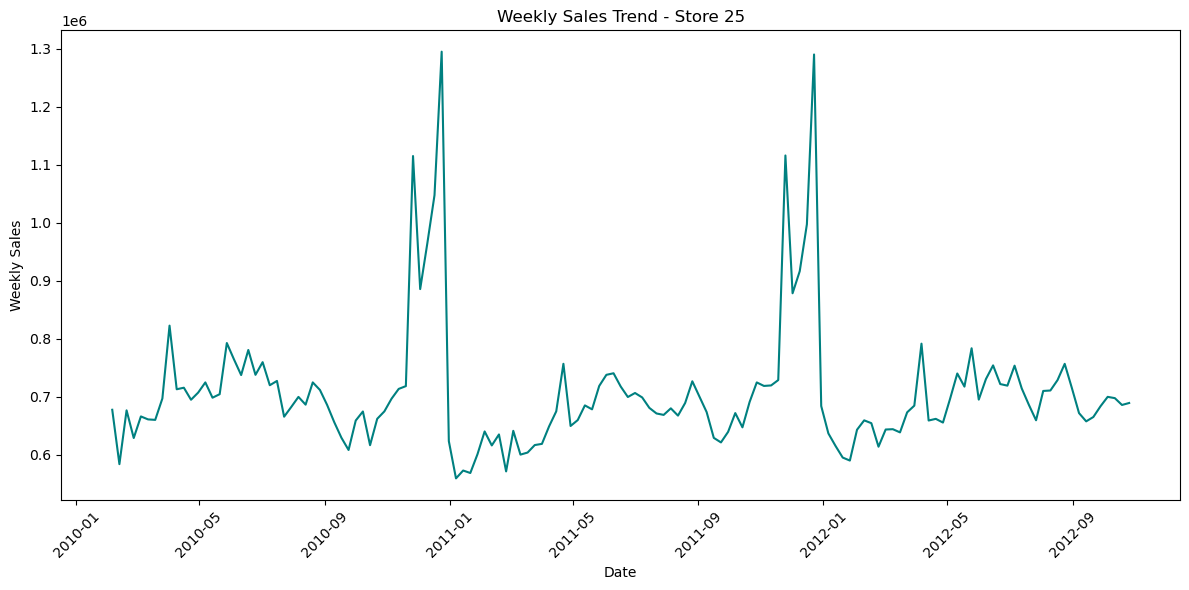

In [89]:
# User input
try:
    store_number = int(input("Enter a store number (1 to 45): "))

    # Check and plot
    if store_number not in df['Store'].unique():
        print(f"Store {store_number} not found in the dataset.")
    else:
        store_data = df[df['Store'] == store_number]

        plt.figure(figsize=(12,6))
        sns.lineplot(data=store_data, x='Date', y='Weekly_Sales', color='teal')
        plt.title(f"Weekly Sales Trend - Store {store_number}")
        plt.xlabel("Date")
        plt.ylabel("Weekly Sales")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
except ValueError:
    print("Invalid input. Please enter an integer number between 1 and 45.")

- Reveals temporal sales fluctuations.
- Spikes often align with holidays; valleys may indicate off-seasons or regional downturns.


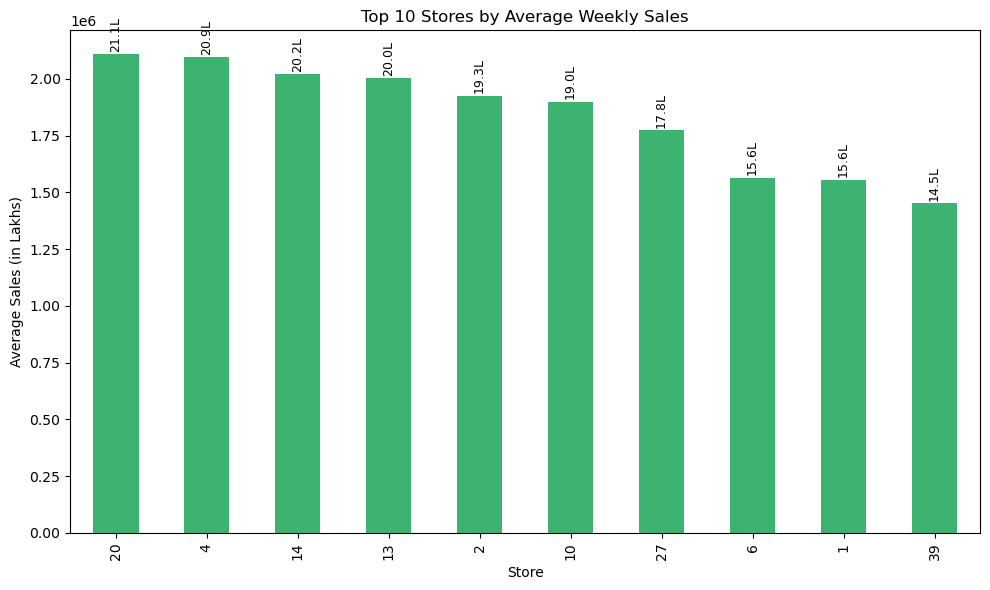

In [92]:
import matplotlib.pyplot as plt

# Step 1: Group, get mean sales, sort, and take top 10
top_10_avg_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)

# Step 2: Plot
plt.figure(figsize=(10,6))
bars = top_10_avg_sales.plot(kind='bar', color='mediumseagreen')

# Step 3: Annotate with Lakhs
for i, v in enumerate(top_10_avg_sales):
    plt.text(i, v + 10000, f'{v/1e5:.1f}L', ha='center', va='bottom', fontsize=9, rotation=90)

# Step 4: Labels and title
plt.title("Top 10 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Sales (in Lakhs)")
plt.tight_layout()
plt.show()


- Highlights consistently strong stores—valuable for benchmarking operations.
- These stores may have strategic locations or better holiday marketing impact.


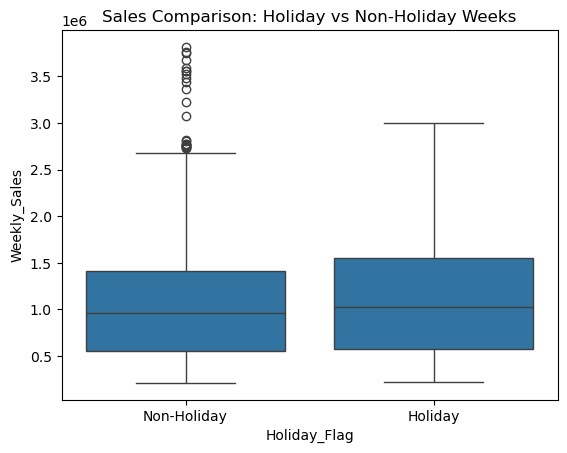

In [95]:
sns.boxplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Sales Comparison: Holiday vs Non-Holiday Weeks")
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.show()


- Contrary to intuition, non-holiday weeks show a wider sales range and higher median.
- Not all holiday campaigns lead to higher revenues—may suggest reassessing promotional timing or discount strategies.


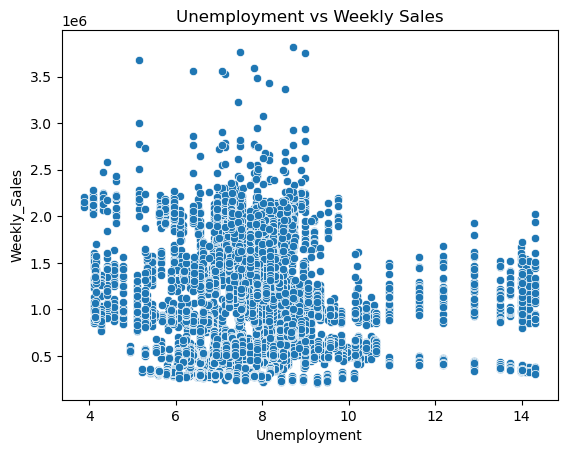

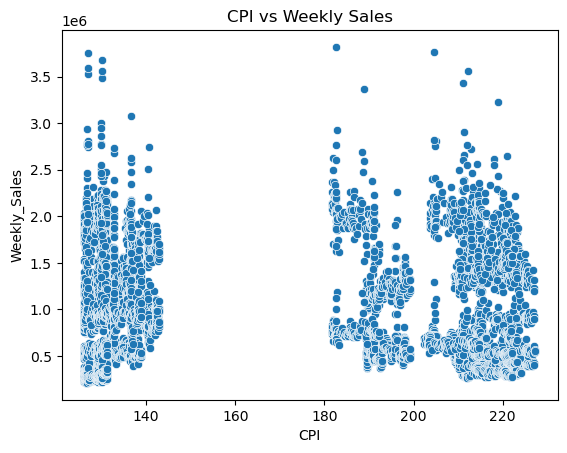

In [98]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
plt.title("Unemployment vs Weekly Sales")
plt.show()

sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
plt.title("CPI vs Weekly Sales")
plt.show()


**Unemployment vs Weekly Sales (Scatterplot)**
- Weak or negligible correlation.
- Suggests unemployment doesn't directly influence weekly Walmart sales in a linear way—customers likely continue buying essentials.

**CPI vs Weekly Sales**
- Also shows weak correlation.
- Implies inflation (CPI) alone isn't a direct sales driver—other factors like store location and seasonality matter more.


**Unemployment vs Weekly Sales (Scatterplot)**
- Weak or negligible correlation.
- Suggests unemployment doesn't directly influence weekly Walmart sales in a linear way—customers likely continue buying essentials.

**CPI vs Weekly Sales**
- Also shows weak correlation.
- Implies inflation (CPI) alone isn't a direct sales driver—other factors like store location and seasonality matter more.


- December consistently peaks—expected due to year-end holidays.
- Summer months show moderate dips, indicating seasonal variation in shopping behavior.


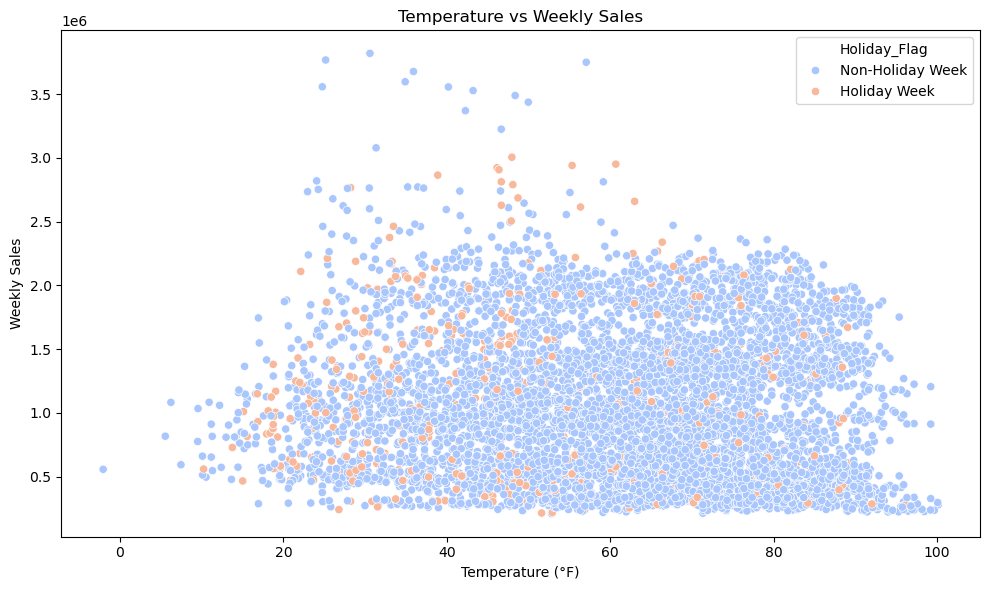

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', palette='coolwarm')
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature (°F)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

- No strong correlation, but warmer weeks sometimes show increased sales during holidays.
- Suggests localized shopping patterns or weather-dependent buying behavior (e.g., air conditioners, summer clothes).


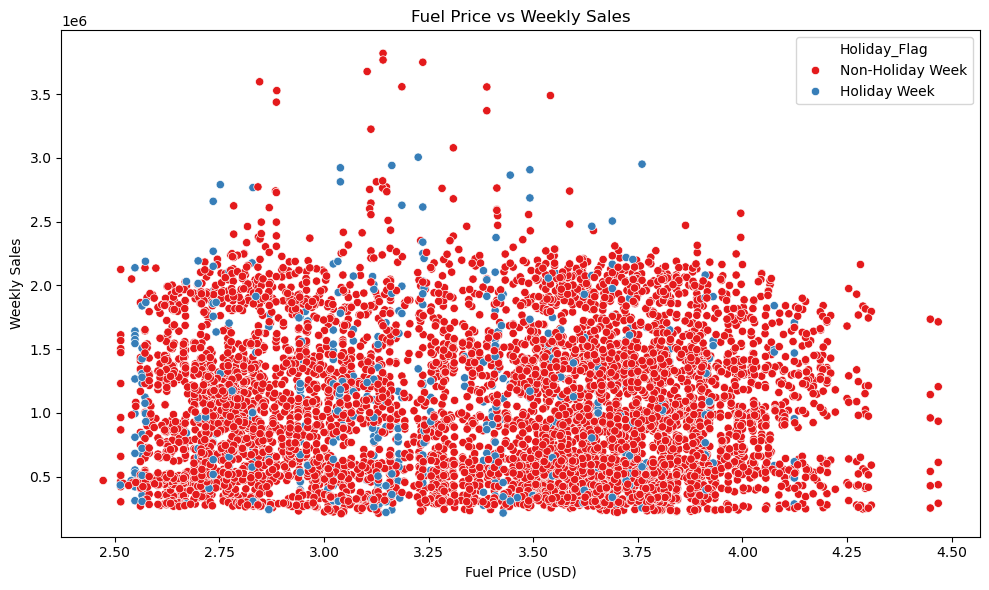

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag', palette='Set1')
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price (USD)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()


- Similarly low impact.
- Could indicate Walmart’s strong value proposition is resilient to fuel cost variations.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


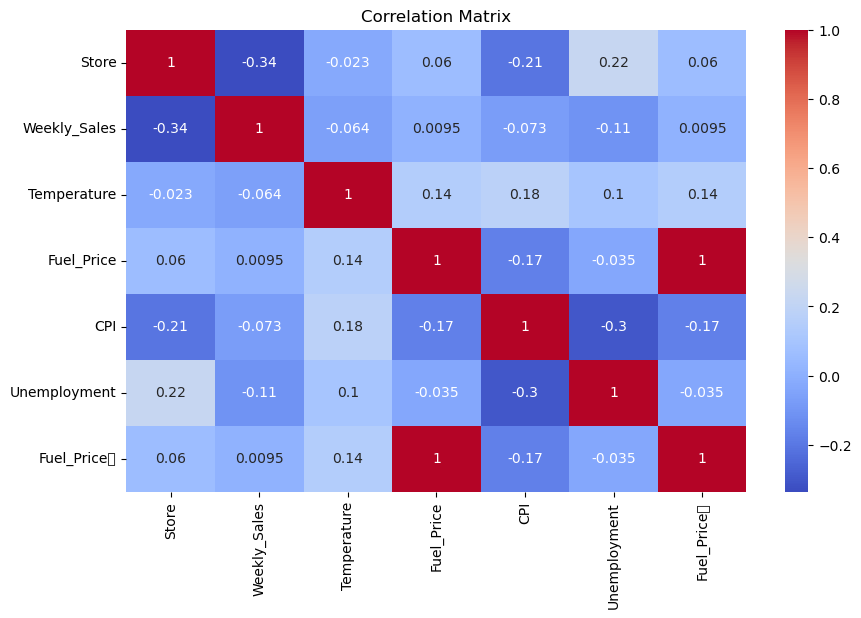

In [111]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

- Most features (Fuel Price, CPI, Unemployment, Temperature) show weak correlations with Weekly_Sales.
- Suggests need for further categorical or store-specific analysis rather than relying on broad numerical indicators.


# **🧠 How This Analysis Supports Business Objectives**

- Strategic Stocking: Prioritize inventory in top-performing stores and around peak months (e.g., December).

- Targeted Marketing: Non-holiday weeks with high variance may hold untapped potential for promotions.

- Store-Level Optimization: Underperforming stores (like Store 33, 44) should be investigated—issues might be operational, demographic, or competitive.

- Holiday Planning: Reconsider blanket holiday sales strategies; not all yield proportional results.


# **🧾 Conclusion**

This EDA unveils crucial patterns and uncovers which stores and time periods drive Walmart's revenue. While seasonal spikes and store-based disparities are evident, macroeconomic variables like CPI and unemployment had limited direct impact. For future growth, Walmart could focus on tailored regional strategies, refining holiday campaigns, and supporting weaker stores through localized planning. A more granular demographic overlay might further enhance this analysis.
